In [1]:
import torch

from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

from TNN import Mining, Model
from TNN.Plot import scatter
from TNN.Loss_Fn import triplet_loss

In [2]:
tsne = TSNE(random_state=0)

In [3]:
device = torch.device('cuda:0')
tsne = TSNE(random_state=0)
batch_size_train = 128

In [4]:
train_set = MNIST('./MNIST/', train=True, download=True)            
test_set = MNIST('./MNIST/', train=False, download=True)

In [5]:
X_train, X_test = Mining.offline(train_set.data.unsqueeze(1).numpy(), train_set.targets.numpy(), ap_pairs=150, an_pairs=150,testsize=0.2)

In [6]:
model = Model.TNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [7]:
batch_size = 512
train_loader = DataLoader(TensorDataset(torch.tensor(X_train).float()), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(torch.tensor(X_test).float()), batch_size=batch_size)

## Getting a train and test batch for visualization

In [8]:
(vis_test_batch_x,vis_test_batch_y) = (test_set.data[:batch_size], test_set.targets[:batch_size])
vis_test_batch_x = vis_test_batch_x.float()
vis_test_batch_y = vis_test_batch_y.float()

In [9]:
(vis_train_batch_x,vis_train_batch_y) = (train_set.data[:batch_size], train_set.targets[:batch_size])
vis_train_batch_x = vis_train_batch_x.float()
vis_train_batch_y = vis_train_batch_y.float()

## MNIST distribution 

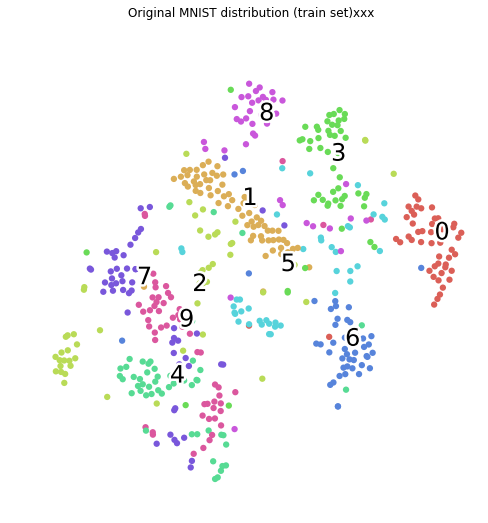

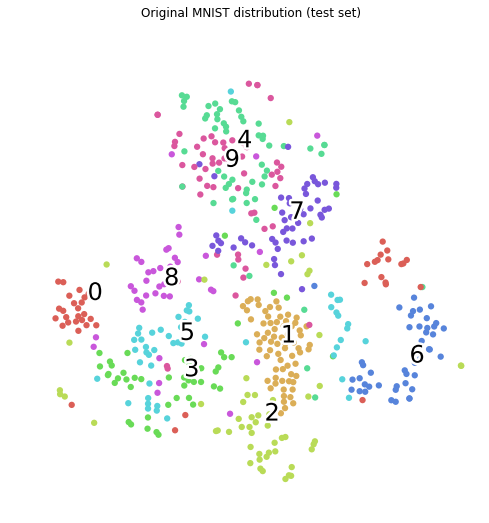

In [10]:
vis_train_batch_x_2d = tsne.fit_transform(vis_train_batch_x.flatten(1))
scatter(vis_train_batch_x_2d, vis_train_batch_y.cpu().numpy(), subtitle='Original MNIST distribution (train set)xxx')

vis_test_batch_x_2d = tsne.fit_transform(vis_test_batch_x.flatten(1))
scatter(vis_test_batch_x_2d, vis_test_batch_y.cpu().numpy(), subtitle='Original MNIST distribution (test set)')

In [11]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (x,) in enumerate(train_loader, 0):
        # get the inputs
        inputs = x.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        anchor = model(inputs[:,0])
        positive = model(inputs[:,1])
        negative = model(inputs[:,2])
        loss = triplet_loss(anchor, positive, negative, alpha=0.5, device=device).mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%2 == 0:
            print(f"At epoches = {epoch}, {i}/{len(train_loader)}, loss = {loss:.5f}"
                  , end='\r')
    epoch_loss = running_loss / len(train_loader)
    
   
    
#     scatter(train_tsne_embeds, vis_train_batch_y.cpu().numpy(), epoch+1)
    print(" "*100)
    print(f"At epoches = {epoch}, epoch_loss = {epoch_loss}")
print('Finished Training')

                                                                                                    
At epoches = 0, epoch_loss = 120.29607597840103
                                                                                                    
At epoches = 1, epoch_loss = 42.168781244534664
                                                                                                    
At epoches = 2, epoch_loss = 10.962865564125506
                                                                                                    
At epoches = 3, epoch_loss = 4.147421986118636
                                                                                                    
At epoches = 4, epoch_loss = 1.2501153217586265
                                                                                                    
At epoches = 5, epoch_loss = 0.3050779795951464
                                                                                                    
At epo

                                                                                                    
At epoches = 55, epoch_loss = 0.0
                                                                                                    
At epoches = 56, epoch_loss = 0.0
                                                                                                    
At epoches = 57, epoch_loss = 0.0
                                                                                                    
At epoches = 58, epoch_loss = 0.0
                                                                                                    
At epoches = 59, epoch_loss = 0.0
                                                                                                    
At epoches = 60, epoch_loss = 0.0
                                                                                                    
At epoches = 61, epoch_loss = 0.0
                                                       

In [12]:
train_outputs = model(vis_train_batch_x.unsqueeze(1).to(device))  
train_tsne_embeds = tsne.fit_transform(train_outputs.cpu().detach().numpy())

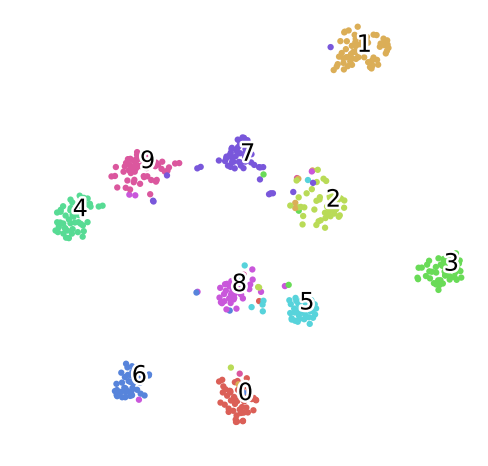

In [13]:
scatter(train_tsne_embeds, vis_train_batch_y.cpu().numpy(), subtitle='TNN distribution (train set)')

In [14]:
test_outputs = model(vis_test_batch_x.unsqueeze(1).to(device))  
test_tsne_embeds = tsne.fit_transform(test_outputs.cpu().detach().numpy()) 

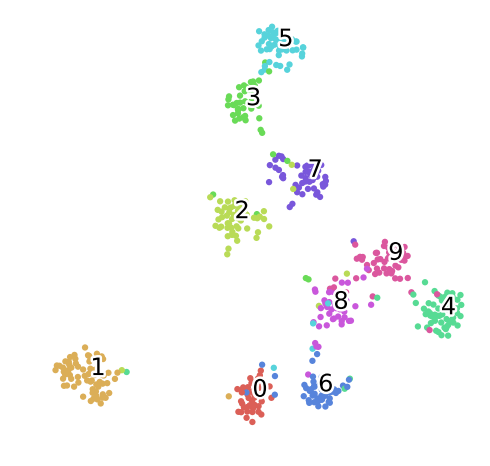

In [15]:
scatter(test_tsne_embeds, vis_test_batch_y.cpu().numpy(), subtitle='TNN distribution (test set)')